# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/code/amalsalilan/uncovering-hidden-trends-in-the-video-game-industr/data?select=Video+Games+Sales.csv

Import the necessary libraries and create your dataframe(s).

In [2]:
#import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in my dataset

df = pd.read_csv("Video Games Sales.csv")

# Get information on data and see the first five entries
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [4]:
#Check how much data is missing for each column
#The only missing data is from the Year column and the Publisher column
df.isna().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [5]:
#This shows a data percentage list
#In the step above we saw that we have a few missing records for Year
#However these missing entries represnt a small percentage (2%) which
#could be negligible in our analysis
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

index - 0%
Rank - 0%
Game Title - 0%
Platform - 0%
Year - 2%
Genre - 0%
Publisher - 0%
North America - 0%
Europe - 0%
Japan - 0%
Rest of World - 0%
Global - 0%
Review - 0%


In [28]:
#Take a closer look at at the games that have null values for Year column
df_null_years = df[df['Year'].isna()]
print(df_null_years.shape)
df_null_years

(29, 13)


,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
143,143,144,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,87.00
253,253,254,RollerCoaster Tycoon,PC,NaN,Strategy,Unknown,3.82,0.01,0.00,0.00,3.83,87.00
301,301,302,FIFA Soccer 2004,PS2,NaN,Sports,Unknown,0.59,2.36,0.04,0.51,3.49,81.00
373,373,374,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,91.00
434,434,435,LEGO Batman: The Videogame,Wii,NaN,Adventure,Warner Bros. Interactive Entertainment,1.59,0.86,0.00,0.27,2.72,80.00
523,523,524,Rock Band,X360,NaN,Misc,Electronic Arts,1.88,0.31,0.00,0.21,2.40,77.00
524,524,525,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Unknown,2.15,0.18,0.00,0.07,2.39,69.00
573,573,574,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Adventure,LucasArts,1.44,0.57,0.00,0.21,2.22,81.00
582,582,583,Call of Duty 3,Wii,NaN,Shooter,Unknown,1.13,0.82,0.00,0.23,2.18,69.91
646,646,647,Rock Band,Wii,NaN,Misc,MTV Games,1.31,0.54,0.00,0.20,2.05,80.13


In [29]:
#Take a closer look at at the games that have null values for publisher column
df_null_publisher = df[df['Publisher'].isna()]
print(df_null_publisher.shape)
df_null_publisher

(2, 13)


,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
373,373,374,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00,91.00
1016,1016,1017,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46,69.72


In [ ]:
#For the missing data I will likely manually fill the missing information myself in the future

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [30]:
#See some basic states for the columns in our dataset
df.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


C:\Users\Ocey 2.0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global', ylabel='Density'>

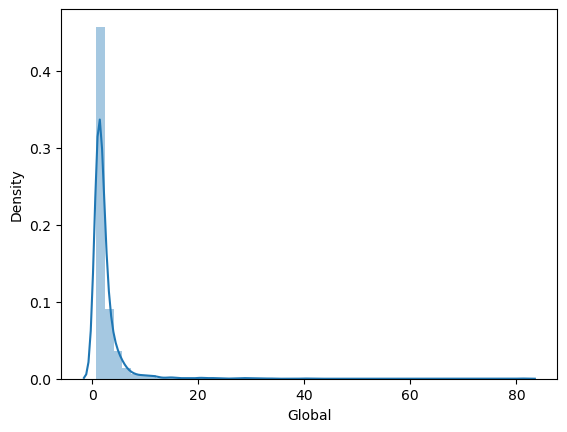

In [31]:
#Look at a distributioon plot of Global sales
sns.distplot(df.Global)

{'whiskers': [<matplotlib.lines.Line2D at 0x23151800460>,
 'caps': [<matplotlib.lines.Line2D at 0x23151800880>,
 'boxes': [<matplotlib.lines.Line2D at 0x23151800190>,
 'medians': [<matplotlib.lines.Line2D at 0x23151800fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x23151479eb0>,
 'means': []}

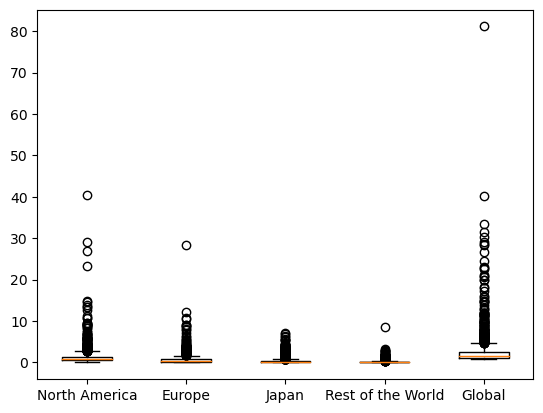

In [39]:
#Plotting a boxplot using matplotlib
#create seperate datasets with just the values from the sales columns

North_America = df["North America"].values
Europe = df["Europe"].values
Japan = df["Japan"].values
Rest_of_the_World = df["Rest of World"].values
Global = df["Global"].values

plt.boxplot([North_America, Europe, Japan, Rest_of_the_World, Global],
             labels=['North America', 'Europe', 'Japan', 'Rest of the World','Global'])

In [ ]:
#Looking at the plot above I can see there are some outliers in our boxplot
#Since this information is a representation of sales I will not do anythong to the outliers

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [ ]:
#There are two columns I'm not sure I am going to work with often (Rank and Revies)
#I will keep these colomns in the data frame becasue I may want to explore them further along in
#the analysis

In [44]:
#Check for duplicates
#There are no duplicates
df.duplicated().value_counts()

False    1907
dtype: int64

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [53]:
#Looking at my Discrete coloumns I do not see any incosistencies
#I do not see any in my Numerical data either from my previous analysis from above
#May want to take a closer look at games that made zero in sales
print(df["Genre"].unique())
print(df["Publisher"].unique())

['Sports' 'Platform' 'Racing' 'Puzzle' 'Misc' 'Shooter' 'Simulation'
 'Role-Playing' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Take-Two Interactive' 'Microsoft Game Studios'
 'Sony Computer Entertainment' 'Activision' 'Electronic Arts' 'Ubisoft'
 'Red Orb' 'Square' 'Bethesda Softworks' 'Capcom' '505 Games'
 'GT Interactive' 'Konami Digital Entertainment' 'Sega' 'Square Enix'
 'Virgin Interactive' 'Universal Interactive' 'Eidos Interactive'
 'RedOctane' 'LucasArts' 'Atari' 'Vivendi Games' 'Enix Corporation'
 'Namco Bandai Games' 'Warner Bros. Interactive Entertainment'
 'Hasbro Interactive' 'Unknown' 'THQ' 'Disney Interactive Studios'
 'Acclaim Entertainment' 'Level 5' nan 'MTV Games' 'Codemasters'
 'id Software' 'Havas Interactive' 'Majesco Entertainment' 'Midway Games'
 'Hudson Soft' 'JVC' 'Valve Software' '989 Studios' 'Maxis' 'Square EA'
 'Tecmo Koei' 'Gotham Games' 'Deep Silver' 'Infogrames'
 'Arena Entertainment' 'Mindscape' 'Banpresto' 'NCSoft'
 'Crave Entertainmen

In [57]:
#Checkkng to see if any games came up with zero sales for the Global column
Global_zero_sales = df[df["Global"] == 0]
Global_zero_sales["Game Title"]

Series([], Name: Game Title, dtype: object)

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
        
        Yes! There was definitely some missing data and inconsistences (Games with zero sales)
        
        
2. Did the process of cleaning your data give you new insights into your dataset?
        
        The exploratory process gave me more insight on my data. I didn't change the dataset much from the original because the original was fiarly clean.
        
        
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
        
        I want to look more into how to change/update values for the missing Years and Publisher. I will also want to investigate the metric of sales and understand why some sales are zero for certain games in differnt countries.
        
        